## Поиск ассоциативных правил

In [9]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data = pd.read_csv('C:/Users/Marie/Downloads/Goods2000.csv')

trans=[]
for i in range(0, data.shape[0]):
    trans.append([str(data.values[i,j]) for j in range(0, data.shape[1])])

trans=np.array(trans)

t=TransactionEncoder()
data_df=t.fit_transform(trans)
data_df=pd.DataFrame(data_df, columns=t.columns_, dtype=int)

data_df.drop('nan', axis=1, inplace=True)
data_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
freq_items=apriori(data_df, min_support=0.005, use_colnames=True)
freq_items

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
996,0.005186,"(root vegetables, other vegetables, whipped/so..."
997,0.007829,"(root vegetables, yogurt, whole milk, other ve..."
998,0.007626,"(other vegetables, yogurt, tropical fruit, who..."
999,0.005592,"(other vegetables, yogurt, whipped/sour cream,..."


## Алгоритм поиска ассоциативных правил

In [5]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.25)
rules = rules[['antecedents', 'consequents', 'confidence']]
rules

,antecedents,consequents,confidence
0,(baking powder),(other vegetables),0.413793
1,(baking powder),(whole milk),0.522989
2,(beef),(other vegetables),0.375969
3,(beef),(rolls/buns),0.259690
4,(beef),(root vegetables),0.331395
...,...,...,...
668,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.700000
669,"(root vegetables, yogurt, whole milk)",(tropical fruit),0.391608
670,"(root vegetables, tropical fruit, whole milk)",(yogurt),0.474576
671,"(yogurt, tropical fruit, whole milk)",(root vegetables),0.375839


## Визуализация результатов

In [7]:
import time

confidence = np.arange(0.1, 0.41, 0.05)

time_values = []
count_values = []
max_values = []
less_then_3_values = []

for i in confidence:
    t1=time.time()
    rules = association_rules(freq_items, metric='confidence', min_threshold=i)
    t2=time.time()
    
    time_values.append((t2-t1)*1000)
    count_values.append(rules.shape[0])
    max_values.append(max(len(row['antecedents']) + len(row['consequents']) for index, row in rules.iterrows()))
    less_then_3_values.append(
        rules[(rules['antecedents'].apply(lambda x: len(x))) + (rules['consequents'].apply(lambda x: len(x))) <= 2].shape[0])

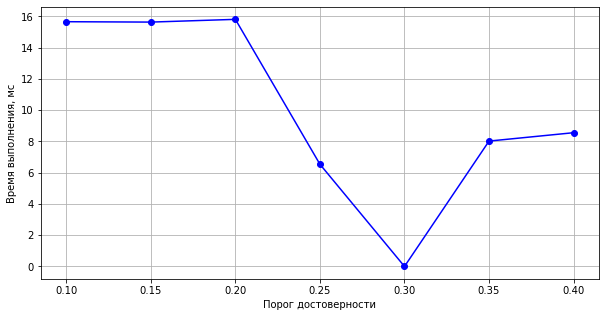

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(confidence, time_values, 'b', marker='o')

plt.xticks(confidence)

plt.xlabel("Порог достоверности")
plt.ylabel("Время выполнения, мс")

plt.show()

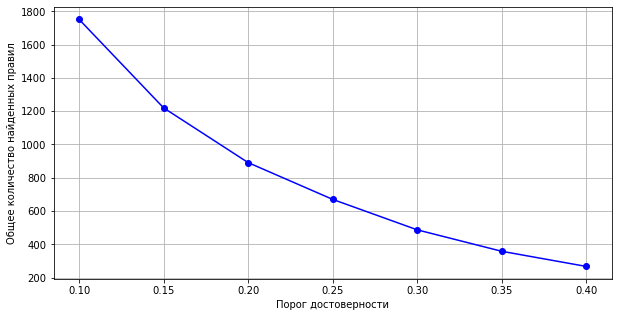

In [11]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(confidence, count_values, 'b', marker='o')

plt.xticks(confidence)

plt.xlabel("Порог достоверности")
plt.ylabel("Общее количество найденных правил")

plt.show()

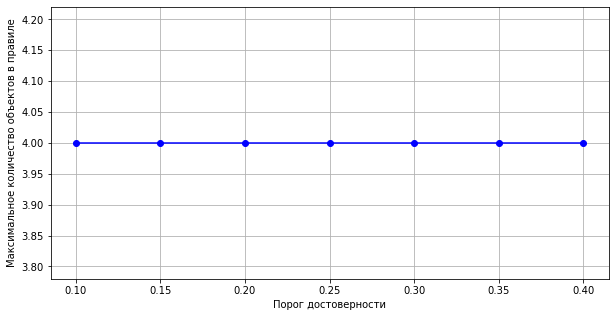

In [12]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(confidence, max_values, 'b', marker='o')

plt.xticks(confidence)

plt.xlabel("Порог достоверности")
plt.ylabel("Максимальное количество объектов в правиле")

plt.show()

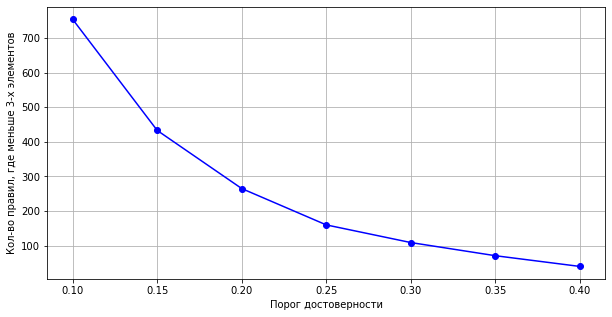

In [13]:
plt.figure(figsize=(10, 5))
plt.grid()

plt.plot(confidence, less_then_3_values, 'b', marker='o')

plt.xticks(confidence)

plt.xlabel("Порог достоверности")
plt.ylabel("Кол-во правил, где меньше 3-х элементов")

plt.show()